In [6]:
import s3fs 
import xarray 
import metpy 
import cartopy 
import pandas 
import matplotlib as M
import matplotlib.pyplot as plt 

s3 = s3fs.S3FileSystem(anon=True)
def lookup(path):
    return s3fs.S3Map(path, s3=s3)

path = "hrrrzarr/sfc/20210101/20210101_00z_anl.zarr/surface/TMP" 
ds = xarray.open_mfdataset([lookup(path), lookup(f"{path}/surface")], 
                           engine="zarr") 


In [7]:
ds

<xarray.Dataset>
Dimensions:                  (projection_y_coordinate: 1059,
                              projection_x_coordinate: 1799)
Coordinates:
  * projection_x_coordinate  (projection_x_coordinate) float64 -2.698e+06 ......
  * projection_y_coordinate  (projection_y_coordinate) float64 -1.587e+06 ......
Data variables:
    TMP                      (projection_y_coordinate, projection_x_coordinate) float16 dask.array<chunksize=(150, 150), meta=np.ndarray>
    forecast_period          timedelta64[ns] ...
    forecast_reference_time  datetime64[ns] ...
    height                   float64 ...
    pressure                 float64 ...
    time                     datetime64[ns] ...

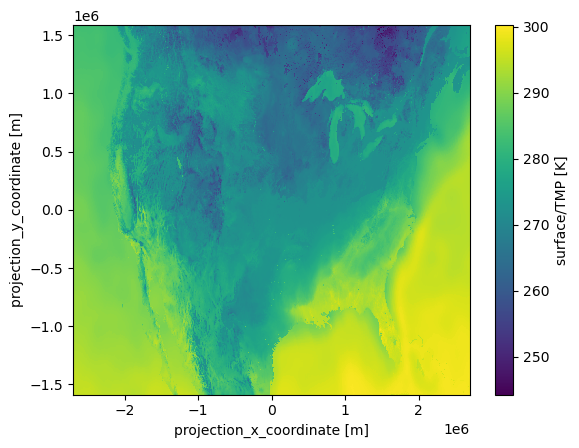

In [8]:
ds.TMP.plot()
